In [1]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('Business Formation Statistics.xlsx')

In [53]:
df.head(20).sort_values('')

,Date,category,state abbr,state,Business Applications from Corporations,Business Applications,Month
0,2005-07-01,Transportation and Warehousing,US,U.S. Total,5852,19769,July
1,2007-02-01,Health Care and Social Assistance,US,U.S. Total,8505,29226,February
2,2014-09-01,Information,US,U.S. Total,2142,8624,September
3,2012-03-01,Professional Services,US,U.S. Total,17239,74361,March
4,2006-12-01,Agriculture,US,U.S. Total,1313,5751,December
5,2017-10-01,Total for All NAICS,SD,South Dakota,89,1377,October
6,2012-02-01,Finance and Insurance,US,U.S. Total,3786,21082,February
7,2013-09-01,Total for All NAICS,WA,Washington,1096,7105,September
8,2005-09-01,Construction,US,U.S. Total,19361,54289,September
9,2019-03-01,Total for All NAICS,ID,Idaho,277,4023,March


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16492 entries, 0 to 16491
Data columns (total 6 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   month                                    16492 non-null  datetime64[ns]
 1   category                                 16492 non-null  object        
 2   state abbr                               16492 non-null  object        
 3   state                                    16492 non-null  object        
 4   Business Applications from Corporations  16492 non-null  int64         
 5   Business Applications                    16492 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 773.2+ KB


In [5]:
df = df.convert_dtypes()

In [6]:
df.nunique()

month                                        217
category                                      21
state abbr                                    56
state                                         56
Business Applications from Corporations     7002
Business Applications                      12471
dtype: int64

In [7]:
df[['category','state']] = df[['category','state']].astype('category')
df.dtypes

month                                      datetime64[ns]
category                                         category
state abbr                                         string
state                                            category
Business Applications from Corporations             Int64
Business Applications                               Int64
dtype: object

In [8]:
df['category'].unique()

['Transportation and Warehousing', 'Health Care and Social Assistance', 'Information', 'Professional Services', 'Agriculture', ..., 'No NAICS Assigned', 'Retail Trade', 'Mining', 'Accommodation and Food Services', 'Administrative and Support']
Length: 21
Categories (21, string): [Accommodation and Food Services, Administrative and Support, Agriculture, Arts and Entertainment, ..., Total for All NAICS, Transportation and Warehousing, Utilities, Wholesale Trade]

In [9]:
df['state'].unique()

['U.S. Total', 'South Dakota', 'Washington', 'Idaho', 'Iowa', ..., 'Montana', 'Connecticut', 'West', 'Virginia', 'Florida']
Length: 56
Categories (56, string): [Alabama, Alaska, Arizona, Arkansas, ..., West, West Virginia, Wisconsin, Wyoming]

In [10]:
df = df.rename(columns={'month':'Date'})

In [24]:
df['Date'] = df['Date'].dt.strftime('%Y-%d-%m')
df['Date']

0        2005-07-01
1        2007-02-01
2        2014-09-01
3        2012-03-01
4        2006-12-01
            ...    
16487    2011-02-01
16488    2012-08-01
16489    2009-12-01
16490    2005-11-01
16491    2014-10-01
Name: Date, Length: 16492, dtype: object

In [25]:
df['Date'] = pd.to_datetime(
    df['Date'],
    errors = 'coerce',
    format= '%Y-%m-%d'
    
    )

In [31]:
df['Month'] = df['Date'].dt.month_name()

In [76]:
df_copy = df.copy(deep=True)

<AxesSubplot:xlabel='Date', ylabel='Business Applications'>

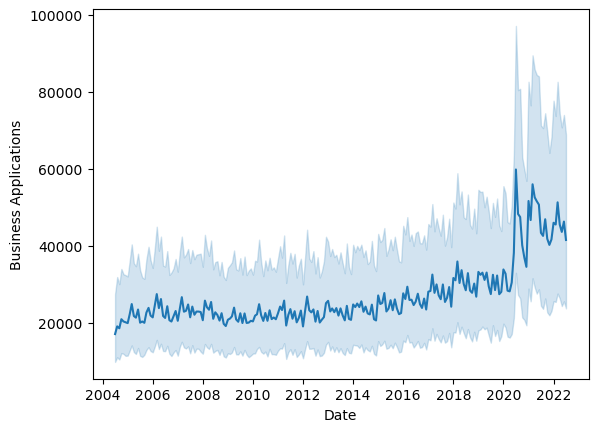

In [51]:
sns.lineplot(data=df_copy, x='Date', y='Business Applications')

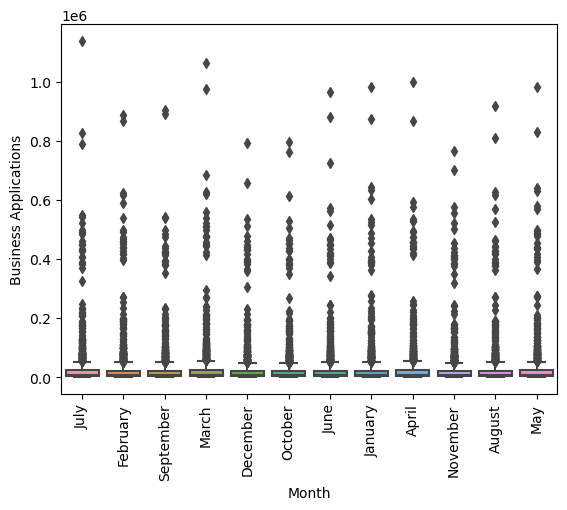

In [52]:
sns.boxplot(data=df_copy, x='Month', y='Business Applications')
plt.xticks(rotation=90)
plt.show()

In [81]:
condition_totals_state = df_copy['state'] == 'U.S. Total'
df_copy = df_copy[condition_totals_state]  
df_copy['category'].unique().tolist()

['Transportation and Warehousing',
 'Health Care and Social Assistance',
 'Information',
 'Professional Services',
 'Agriculture',
 'Finance and Insurance',
 'Construction',
 'Real Estate',
 'Utilities',
 'Wholesale Trade',
 'Management of Companies',
 'Other Services',
 'Arts and Entertainment',
 'Manufacturing',
 'Total for All NAICS',
 'Educational Services',
 'No NAICS Assigned',
 'Retail Trade',
 'Mining',
 'Accommodation and Food Services',
 'Administrative and Support']

In [84]:
condition_total_category = df_copy['category'] == 'Total for All NAICS'
df_copy = df_copy[condition_total_category]
df_copy

,Date,category,state abbr,state,Business Applications from Corporations,Business Applications,Month
84,2006-08-01,Total for All NAICS,US,U.S. Total,150106,462621,August
204,2009-05-01,Total for All NAICS,US,U.S. Total,99663,397634,May
243,2012-04-01,Total for All NAICS,US,U.S. Total,91582,442912,April
366,2008-12-01,Total for All NAICS,US,U.S. Total,92618,365108,December
464,2018-04-01,Total for All NAICS,US,U.S. Total,93739,577266,April
...,...,...,...,...,...,...,...
16331,2008-11-01,Total for All NAICS,US,U.S. Total,94682,375855,November
16368,2022-02-01,Total for All NAICS,US,U.S. Total,99047,865472,February
16394,2014-02-01,Total for All NAICS,US,U.S. Total,89928,458678,February
16405,2006-05-01,Total for All NAICS,US,U.S. Total,166504,498235,May


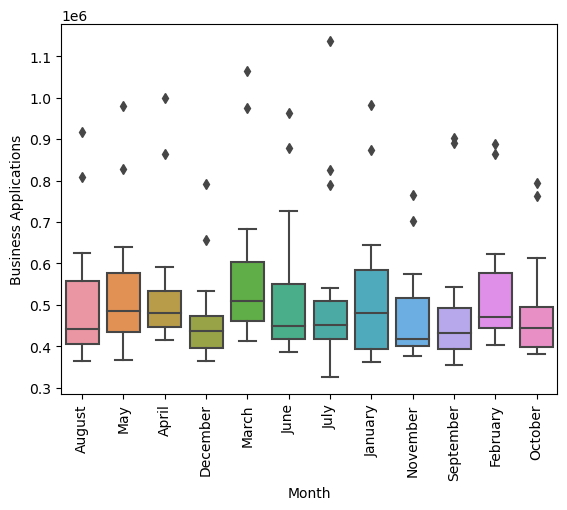

In [95]:
sns.boxplot(data=df_copy, x='Month', y='Business Applications')
plt.xticks(rotation=90)
plt.show()

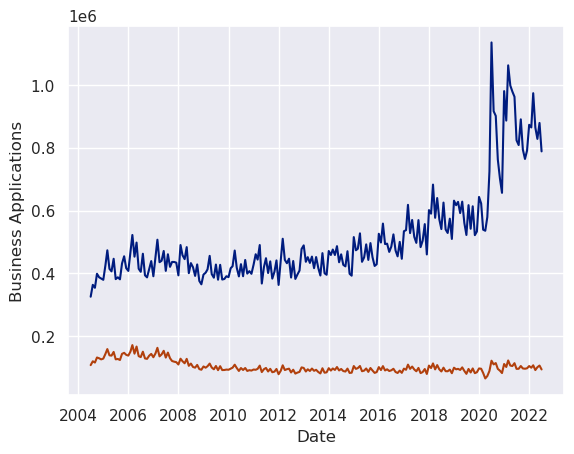

In [101]:

sns.set(palette='dark')
sns.lineplot(data=df_copy,x='Date', y='Business Applications')
sns.lineplot(data=df_copy,x='Date', y='Business Applications from Corporations')
plt.show()